# NU_1

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_pickle('/content/drive/MyDrive/Thesis/DATASETS/NU_Temporal_data_with_trip_info.pkl')
data = data.drop(['id','created_at','trip_created_at','customer_id','trip_start_date','done_at_date'],1)
data

,planned_arrival,driven_by_charter,quantity,done_at,trip_start,trip_ordering,trip_id,driver_id
0,07:00:00,True,1,2019-03-05 13:36:35+00:00,2019-03-05 13:33:51.132775+00:00,1,28541,217.0
1,16:00:00,False,1,2019-03-05 13:37:13+00:00,2019-03-05 13:31:51.780798+00:00,1,28540,4.0
2,08:03:44,True,1,2019-03-05 13:37:41+00:00,2019-03-05 13:33:51.282771+00:00,2,28541,217.0
3,08:59:42,True,1,2019-03-05 13:39:42+00:00,2019-03-05 13:33:52.061596+00:00,3,28541,217.0
4,16:22:02,False,1,2019-03-05 13:39:54+00:00,2019-03-05 13:31:52.383132+00:00,2,28540,4.0
...,...,...,...,...,...,...,...,...
137299,14:17:36,True,1,2020-12-12 13:16:15.343000+00:00,2020-12-12 05:37:40.744000+00:00,26,120190,1041.0
137300,14:15:54,True,1,2020-12-12 13:29:30.562000+00:00,2020-12-12 06:06:53.811000+00:00,17,120180,744.0
137301,15:01:00,True,1,2020-12-12 14:28:47+00:00,2020-12-12 06:06:59.040000+00:00,18,120180,744.0
137303,11:26:38,False,1,2020-12-15 10:02:42.313000+00:00,2020-12-15 06:00:12.137000+00:00,11,120383,242.0


In [ ]:
data.loc[data.trip_id == 120190]

,planned_arrival,driven_by_charter,quantity,done_at,trip_start,trip_ordering,trip_id,driver_id
137112,07:47:21,True,1,2020-12-12 07:01:28.429000+00:00,2020-12-12 05:33:35.028000+00:00,2,120190,1041.0
137119,07:58:22,True,2,2020-12-12 07:12:51.446000+00:00,2020-12-12 05:34:34.047000+00:00,3,120190,1041.0
137133,08:17:58,True,1,2020-12-12 07:35:20.954000+00:00,2020-12-12 05:37:45.738000+00:00,5,120190,1041.0
137138,08:32:07,True,1,2020-12-12 07:47:42.245000+00:00,2020-12-12 05:31:35.894000+00:00,7,120190,1041.0
137145,08:17:58,True,1,2020-12-12 08:00:55.407000+00:00,2020-12-12 05:36:35.633000+00:00,6,120190,1041.0
137169,09:01:49,True,10,2020-12-12 08:36:04.989000+00:00,2020-12-12 05:37:01.614000+00:00,10,120190,1041.0
137170,09:01:49,True,2,2020-12-12 08:36:33.609000+00:00,2020-12-12 05:37:52.048000+00:00,9,120190,1041.0
137174,09:09:44,True,1,2020-12-12 08:44:03.599000+00:00,2020-12-12 05:31:47.501000+00:00,11,120190,1041.0
137186,09:38:22,True,1,2020-12-12 09:07:30.569000+00:00,2020-12-12 05:32:10.081000+00:00,12,120190,1041.0
137229,11:02:29,True,1,2020-12-12 10:25:03.758000+00:00,2020-12-12 05:36:07.586000+00:00,15,120190,1041.0


In [ ]:
max(data.loc[data.trip_id == 120190].trip_start)

Timestamp('2020-12-12 05:38:01.347000+0000', tz='UTC')

In [ ]:
dataframe = pd.DataFrame()

for trip in list(data.trip_id.unique()):

    trip_i = data.loc[data.trip_id == trip].sort_values('done_at').reset_index(drop = True)
    trip_i['travel_start'] = None

    for i in range(0,len(trip_i)):
    if i == 0:
        trip_i['travel_start'][i] = max(trip_i.trip_start)
    else:
        trip_i['travel_start'][i] = trip_i['done_at'][i-1]

    trip_i['planned_arrival'][i] = str(trip_i.done_at[0])[0:10] +' '+ str(trip_i['planned_arrival'][i]) 

    dataframe = dataframe.append(trip_i)

In [ ]:
dataframe[dataframe.trip_id == 120190]

In [ ]:
dataframe.dtypes

In [ ]:
dataframe.travel_start.dt.hour

In [ ]:
from sklearn.preprocessing import LabelEncoder
from datetime import time

def data_preprocessing(data):

    labelencoder = LabelEncoder()

    data['driver_id'] = labelencoder.fit_transform(data['driver_id'])
    data['driven_by_charter'] = labelencoder.fit_transform(data['driven_by_charter'])
    # data['end'] = labelencoder.fit_transform(data['end'])

    # data['Timestamp'] = data['Date'].dt.strftime('%Y-%m-%d').astype('str') +' '+ data['TOD'].astype('str')
    data['travel_start'] = data['travel_start'].astype(np.datetime64)
    data['planned_arrival'] = data['planned_arrival'].astype(np.datetime64)

    data = data.sort_values('done_at').reset_index(drop=True)

    data['dept_hour'] = data['travel_start'].dt.hour
    data['dept_minute'] = data['travel_start'].dt.minute
    data['dept_dayofweek'] = data['travel_start'].dt.dayofweek
    data['dept_monthofyear'] = data['travel_start'].dt.month 

    data['scheduled_hour'] = data.planned_arrival.dt.hour
    data['scheduled_minute'] = data.planned_arrival.dt.minute

    # Remove timezone from trip_created_at
    data['done_at'] = [dt.replace(tzinfo=None) for dt in data['done_at']]

    data['travel_time'] = (data.done_at - data.travel_start).dt.seconds/60 

    data = data.drop(['trip_id','planned_arrival','done_at','trip_start','travel_start'],1)
    
    return data

In [ ]:
dataset = data_preprocessing(dataframe)

In [ ]:
dataset

In [ ]:
import pandas as pd

dataset = pd.read_pickle('NU_1.pkl')
dataset.head()

,driven_by_charter,quantity,trip_ordering,driver_id,dept_hour,dept_minute,dept_dayofweek,dept_monthofyear,scheduled_hour,scheduled_minute,travel_time
0,1,1,1,20,13,33,1,3,7,0,2.700000
1,0,1,1,0,13,31,1,3,16,0,5.333333
2,1,1,2,20,13,36,1,3,8,3,1.100000
3,1,1,3,20,13,37,1,3,8,59,2.016667
4,0,1,2,0,13,37,1,3,16,22,2.683333


In [ ]:
from pandas_profiling import ProfileReport

def generate_report(data,report):
    prof_report = ProfileReport(data)
    return prof_report.to_file(output_file= report+'.html')

generate_report(dataset,'NU_1')

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# train_data = data[data.dept_monthofyear < 6]
# test_data = data[data.dept_monthofyear == 6]

from sklearn.model_selection import train_test_split

X = dataset.drop(['travel_time'],1)
y = dataset['travel_time']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, stratify = X['dept_dayofweek'], random_state=1)

In [ ]:
# train_x, train_y = train_data.drop(['Travel Time'],1), train_data['Travel Time']

In [ ]:
import pickle

with open('NU_1_data/train_x.pkl','rb') as f:
    train_x = pickle.load(f)

with open('NU_1_data/train_y.pkl','rb') as f:
    train_y = pickle.load(f)

with open('NU_1_data/test_x.pkl','rb') as f:
    test_x = pickle.load(f)

with open('NU_1_data/test_y.pkl','rb') as f:
    test_y = pickle.load(f)

C:\Users\irfan\anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\irfan\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\irfan\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'learning_rate': [0.001, 0.01, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7],
    'n_estimators': [50,100,200,300,400,500],
    'max_depth': range(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(param_grid=gbm_param_grid, estimator=gbm, 
                        scoring='neg_mean_squared_error', cv=2, verbose=1)

# Fit grid_mse to the data
grid_mse.fit(train_x, train_y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 2 folds for each of 2400 candidates, totalling 4800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4800 out of 4800 | elapsed: 275.8min finished


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Lowest RMSE found:  25.592950163432093


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn import model_selection, preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#Fitting XGB regressor 
model = xgb.XGBRegressor(objective= 'reg:linear', eval_metric= 'rmse',
                         colsample_bytree = 0.7, learning_rate = 0.1, max_depth = 6, n_estimators = 500)
model.fit(train_x,train_y)
print (model)

[09:24:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [ ]:
import pickle

file_name = "xgb_reg_NU_1.pkl"

# save
pickle.dump(model, open(file_name, "wb"))

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

[09:24:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# test_x, test_y = test_data.drop(['Travel Time'],1), test_data['Travel Time']

In [ ]:
# test_x

In [ ]:
# Evaluate Model

from sklearn.metrics import mean_absolute_error, r2_score
import math

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(np.abs(errors / test_labels))
    accuracy = 100 - mape
    MSE = np.square(np.subtract(test_labels,predictions)).mean() 
    RMSE = math.sqrt(MSE)
    R2 = r2_score(test_labels,predictions)
    print('Model Performance')
    print('MAE: {:0.4f} minutes.'.format(np.mean(errors)))
    print('RMSE: {:0.2f}.'.format(RMSE))
    print('R2: {:0.2f}.'.format(R2))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
evaluate(xgb_model_loaded, test_x, test_y)

Model Performance
MAE: 14.5695 minutes.
RMSE: 26.51.
R2: 0.81.
Accuracy = -inf%.


-inf

In [ ]:
predictions = xgb_model_loaded.predict(test_x)

In [ ]:
pre_ac = pd.DataFrame()

pre_ac['Actual'] = test_y
pre_ac['Prediction'] = predictions
pre_ac['dayofweek'] = test_x['dept_dayofweek']
pre_ac['travels'] = [l for l in range(0,len(predictions))]

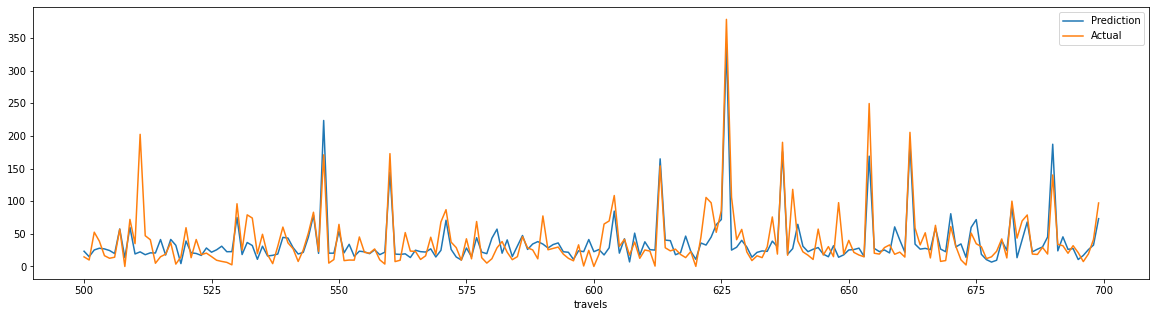

In [ ]:
import matplotlib.pyplot as plt

##### plot according to time of day

pre_ac[500:700].plot(x= "travels" , y=['Prediction', 'Actual'])
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

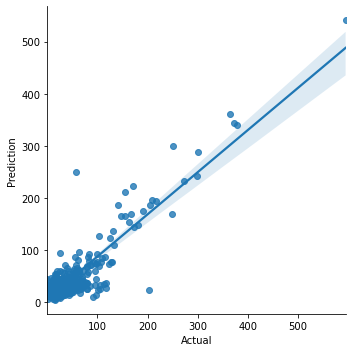

In [ ]:
import seaborn as sns

sns.lmplot(x="Actual", y="Prediction", data=pre_ac[500:1000]);

In [ ]:
import shap
 
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.TreeExplainer(xgb_model_loaded)
shap_values = explainer.shap_values(test_x)

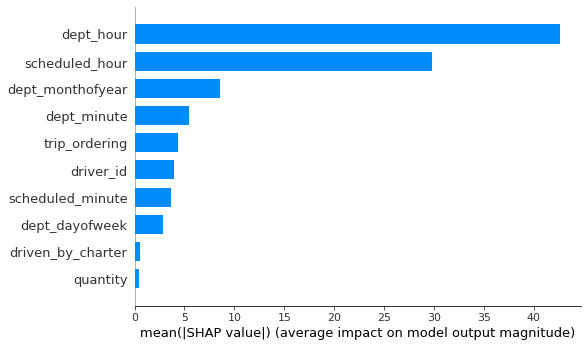

In [ ]:
shap.summary_plot(shap_values, train_x, feature_names = test_x.columns, plot_type="bar")

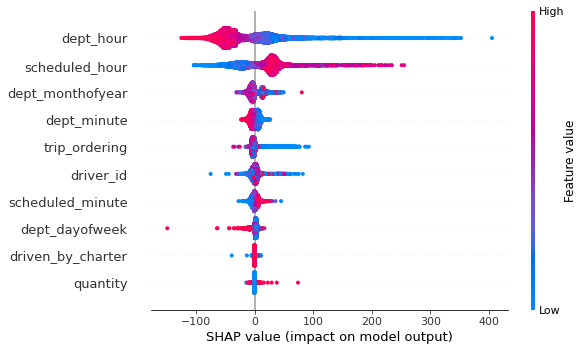

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure()
shap.summary_plot(shap_values, test_x, feature_names = test_x.columns)

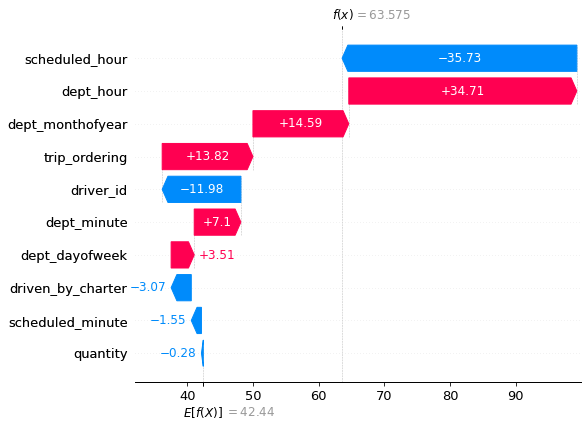

In [ ]:
'''The explanation below shows features each contributing to push the model output from the base value 
(the average model output over the training dataset we passed) to the model output. Features pushing the 
prediction higher are shown in red, those pushing the prediction lower are in blue.'''


shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0], feature_names = test_x.columns, show = True)

In [ ]:
# visualize the first prediction's explanation with a force plot

shap.force_plot(explainer.expected_value, shap_values[0], feature_names = test_x.columns, show = True)

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0:500], feature_names = test_x.columns, show = True)

In [ ]:
# !pip install lime

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(train_x, feature_names=test_x.columns, class_names=['Travel Time'], verbose=True, mode='regression')